In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Leemos nuestro dataset que esta en un archivo xlsx que paso el cliente
dfVentasComple = pd.read_excel('../Ventas Mar-Ago.xlsx')

#hacemos drop de unas columnas que comentaron que no son necesarias agregar en lo mas minimo creando una array de las columnas a eliminar
dropColumns = ['SKU','Código de Barras','Lote','Caducidad del Lote','Estado','Entrega','Cajero','Vendedor','Caja','Sucursal','Canal']
dfVentasComple = dfVentasComple.drop(columns=dropColumns).reset_index()

#Ahora estandarizamos los datos de la fecha de las ventas del cliente pasandolo de un string a un formato de fecha
dfVentasComple['Fecha'] = pd.to_datetime(dfVentasComple['Fecha'])

#Aplicamos el redondeo a los valores de las columnas dejandolo solo en 2 decimales
dfVentasComple['Descuento'] = dfVentasComple['Descuento'].round(2)
dfVentasComple['Margen'] = dfVentasComple['Margen'].round(2)
dfVentasComple['Total'] = dfVentasComple['Total'].round(2)

#Cambiamos el nombre de una columna ya que no se entendia muy bien ya que es precio unitario es decir precio por cada pieza
dfVentasComple = dfVentasComple.rename(columns={'Precio Unitario': 'Precio de Venta'})

#Igualmente creamos 2 nuevas columnas dentro de nuestro set de datos el cual tendra el mes y año de la fecha de la venta que se realizo esto
#para un analisis todavia mas profundo de los datos.
dfVentasComple['Mes'] = dfVentasComple['Fecha'].dt.month
dfVentasComple['Año'] = dfVentasComple['Fecha'].dt.year

#En otro dataframe almacenamos los productos que sean de envio ya que esos no se tomaran para el analisis de las ventas si no como gastos
dfEnvios = dfVentasComple[dfVentasComple['Producto'] == 'Envio'].reset_index()

#Ahora ya que sacamos los envios en el mismo dataframe solo obtenemos las ventas que no sean envios para su analisis
dfVentasComple = dfVentasComple[dfVentasComple['Producto'] != 'Envio'].sort_values(by= 'Fecha', ascending = True).reset_index(drop=True)

#Obtenemos un valor que dentro de el set de datos que no estaba, este es el costo unitario por producto es decir lo que le cuesta cada
#producto unitariamente ya que el set de datos lo tiene todo junto
dfVentasComple['Costo Unitario'] = dfVentasComple['Costo'] / dfVentasComple['Cantidad']

#Reordenamos todo nuestro DF principal de las ventas para su mejor manipulacion y visualizacion
dfVentasComple = dfVentasComple[["index", "Número de Venta", "Fecha", "Mes", "Año", "Producto", "Categoria", "Marca",
         "Costo Unitario", "Cantidad", "Costo", "Subtotal", "Descuento",
         "Total", "Margen", "Cliente"]]

#De nuestro DF principal de todas las ventas de nuestro set de datos, agrupamos por el PRODUCTO, sumando las columnas de cantidad, total y margen
#para tener un nuevo DF donde se guardara por cada producto las unidades totales vendidas, el total de dinero en ventas y el total de margen por producto
#ordenando el MARGEN de mayor a menor y solo mostrando los 10 primeros para identificar que PRODUCTOS han traido mayor MARGEN
dfTotalesProductosVentas = (dfVentasComple.groupby(['Producto'])[['Cantidad','Total','Margen']].sum().reset_index()
    .sort_values(by='Margen', ascending = False).head(10))
dfTotalesProductosVentas

C:\Users\CESAR\AppData\Local\Temp\ipykernel_24008\1181690640.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfVentasComple['Fecha'] = pd.to_datetime(dfVentasComple['Fecha'])


,Producto,Cantidad,Total,Margen
7,Ashwaganda,393,122578.32,56053.32
34,Cafeina Anhidra Cellucor,35,13235.00,3400.00
93,L-Arginina BSN,25,8500.00,2500.00
96,L-Arginina Universal Nutrition,14,5139.91,1989.91
103,Mutivitaminicos BSN,23,7410.00,1890.00
65,Electrolitos Cellucor,13,4775.70,1720.70
89,HMB Universal Nutrition,11,4190.00,1715.00
68,Electrolitos Universal Nutrition,9,3589.79,1564.79
15,BCAA Universal Nutrition,11,5030.00,1455.00
125,Oxido Nitrico Universal Nutrition,6,2704.74,1354.74


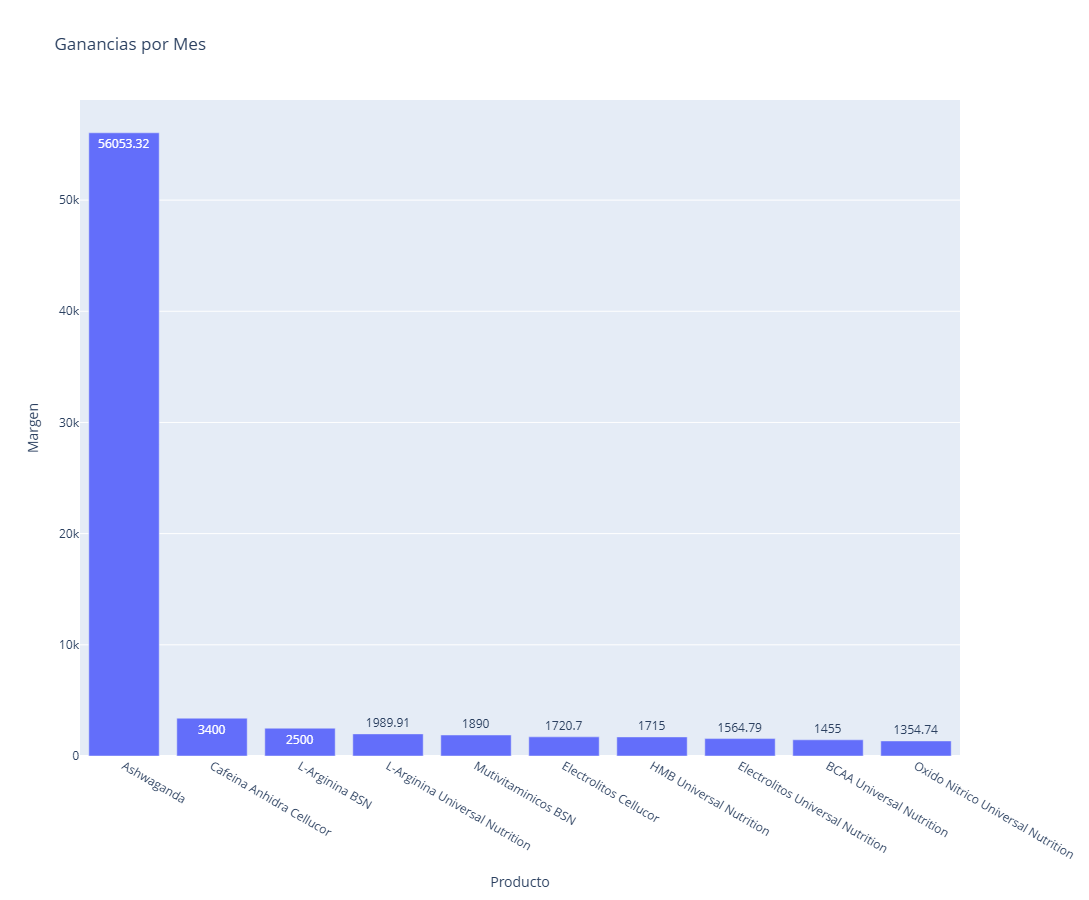

In [2]:
fig = px.bar(dfTotalesProductosVentas, x='Producto', y='Margen', title="Ganancias por Mes", text='Margen',height=900)
fig.show()